## Ex1: Diabetes

In [1]:
mydata <- read.csv("Chapter 18-19\\diabetes.csv")
head(mydata)

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0


In [2]:
#Xem thong tin
print(tail(mydata))
print(paste("No rows: ", nrow(mydata)))
print(paste("No columns: ", ncol(mydata)))
print(summary(mydata))

    Pregnancies Glucose BloodPressure SkinThickness Insulin  BMI
763           9      89            62             0       0 22.5
764          10     101            76            48     180 32.9
765           2     122            70            27       0 36.8
766           5     121            72            23     112 26.2
767           1     126            60             0       0 30.1
768           1      93            70            31       0 30.4
    DiabetesPedigreeFunction Age Outcome
763                    0.142  33       0
764                    0.171  63       0
765                    0.340  27       0
766                    0.245  30       0
767                    0.349  47       1
768                    0.315  23       0
[1] "No rows:  768"
[1] "No columns:  9"
  Pregnancies        Glucose      BloodPressure    SkinThickness  
 Min.   : 0.000   Min.   :  0.0   Min.   :  0.00   Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 62.00   1st Qu.: 0.00  
 Median : 3.000 

In [3]:
str(mydata)

'data.frame':	768 obs. of  9 variables:
 $ Pregnancies             : int  6 1 8 1 0 5 3 10 2 8 ...
 $ Glucose                 : int  148 85 183 89 137 116 78 115 197 125 ...
 $ BloodPressure           : int  72 66 64 66 40 74 50 0 70 96 ...
 $ SkinThickness           : int  35 29 0 23 35 0 32 0 45 0 ...
 $ Insulin                 : int  0 0 0 94 168 0 88 0 543 0 ...
 $ BMI                     : num  33.6 26.6 23.3 28.1 43.1 25.6 31 35.3 30.5 0 ...
 $ DiabetesPedigreeFunction: num  0.627 0.351 0.672 0.167 2.288 ...
 $ Age                     : int  50 31 32 21 33 30 26 29 53 54 ...
 $ Outcome                 : int  1 0 1 0 1 0 1 0 1 1 ...


In [4]:
library('corrplot')

Warning message:
"package 'corrplot' was built under R version 3.6.3"corrplot 0.84 loaded


Warning message:
"package 'Amelia' was built under R version 3.6.3"Loading required package: Rcpp
## 
## Amelia II: Multiple Imputation
## (Version 1.7.6, built: 2019-11-24)
## Copyright (C) 2005-2020 James Honaker, Gary King and Matthew Blackwell
## Refer to http://gking.harvard.edu/amelia/ for more information
## 


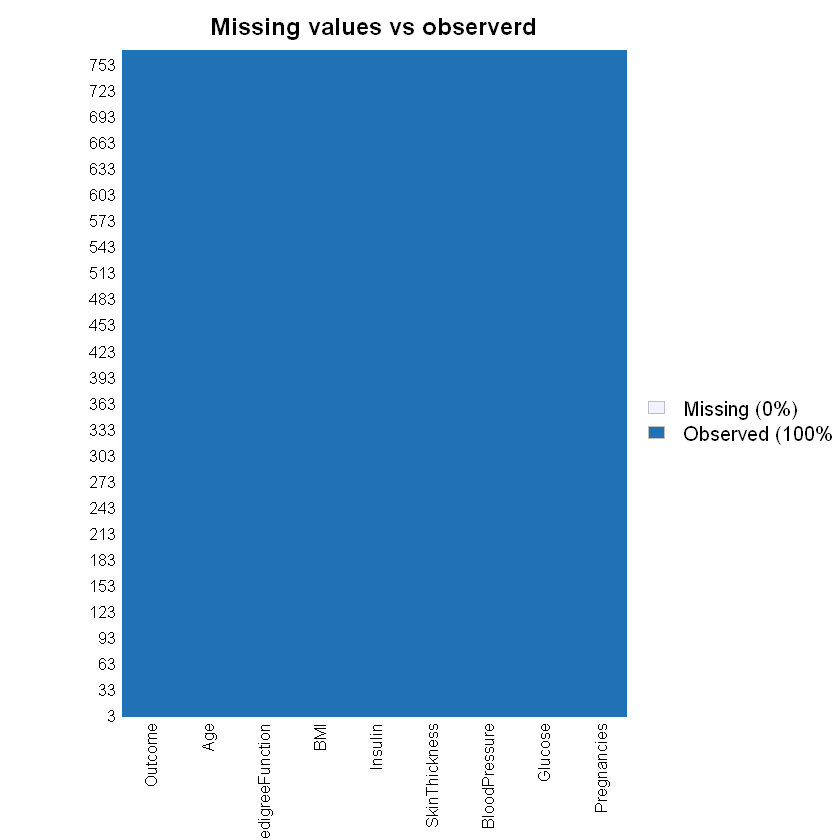

In [5]:
#check missing values
library(Amelia)
missmap(mydata, main = "Missing values vs observerd")

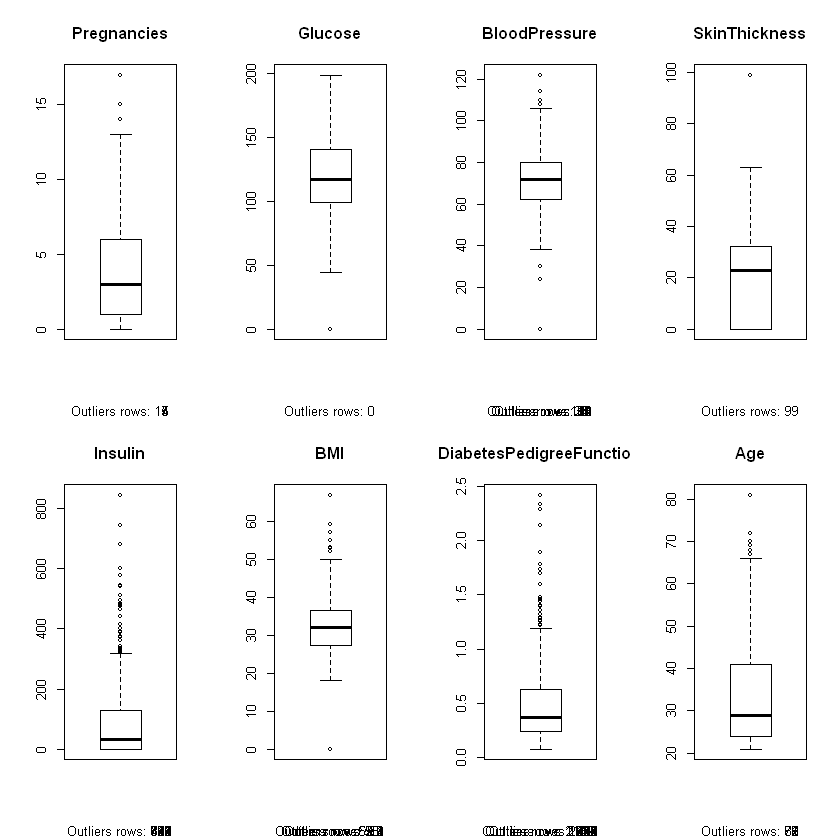

In [6]:
#Xem outlier
par(mfrow = c(2,4) ) #divide graph area in 2 columns
boxplot(mydata$Pregnancies, main = "Pregnancies",
       sub = paste("Outliers rows:", boxplot.stats(mydata$Pregnancies)$out))
boxplot(mydata$Glucose, main = "Glucose",
       sub = paste("Outliers rows:", boxplot.stats(mydata$Glucose)$out))
boxplot(mydata$BloodPressure, main = "BloodPressure",
       sub = paste("Outliers rows:", boxplot.stats(mydata$BloodPressure)$out))
boxplot(mydata$SkinThickness, main = "SkinThickness",
       sub = paste("Outliers rows:", boxplot.stats(mydata$SkinThickness)$out))
boxplot(mydata$Insulin, main = "Insulin",
       sub = paste("Outliers rows:", boxplot.stats(mydata$Insulin)$out))
boxplot(mydata$BMI, main = "BMI",
       sub = paste("Outliers rows:", boxplot.stats(mydata$BMI)$out))
boxplot(mydata$DiabetesPedigreeFunction, main = "DiabetesPedigreeFunction",
       sub = paste("Outliers rows:", boxplot.stats(mydata$DiabetesPedigreeFunction)$out))
boxplot(mydata$Age, main = "Age",
       sub = paste("Outliers rows:", boxplot.stats(mydata$Age)$out))

**Tất cả thuộc tính đều có outliers**

In [7]:
#Loai bo outliers
pregnancy_outliers <- boxplot.stats(mydata$Pregnancies)$out
glucose_outliers <- boxplot.stats(mydata$Glucose)$out
blood_outliers <- boxplot.stats(mydata$BloodPressure)$out
skin_outliers <- boxplot.stats(mydata$SkinThickness)$out
insulin_outliers <- boxplot.stats(mydata$Insulin)$out
bmi_outliers <- boxplot.stats(mydata$BMI)$out
diabe_outliers <- boxplot.stats(mydata$DiabetesPedigreeFunction)$out
age_outliers <- boxplot.stats(mydata$Age)$out

In [8]:
#Drop rows have outliers
print(paste("Befor drop:", nrow(mydata)))
for (record in pregnancy_outliers) {
    mydata <- mydata[mydata$Pregnancies != record,]
}
for (record in glucose_outliers) {
    mydata <- mydata[mydata$Glucose != record,]
}
for (record in blood_outliers) {
    mydata <- mydata[mydata$BloodPressure != record,]
}
for (record in skin_outliers) {
    mydata <- mydata[mydata$SkinThickness != record,]
}
for (record in insulin_outliers) {
    mydata <- mydata[mydata$Insulin != record,]
}
for (record in diabe_outliers) {
    mydata <- mydata[mydata$DiabetesPedigreeFunction != record,]
}
for (record in bmi_outliers) {
    mydata <- mydata[mydata$BMI != record,]
}
for (record in age_outliers) {
    mydata <- mydata[mydata$Age != record,]
}
print(paste("After drop:", nrow(mydata)))

[1] "Befor drop: 768"
[1] "After drop: 639"


                          Pregnancies      Glucose BloodPressure SkinThickness
Pregnancies               1.000000000  0.142092517    0.21066621  -0.094424883
Glucose                   0.142092517  1.000000000    0.23875395  -0.004609418
BloodPressure             0.210666213  0.238753951    1.00000000   0.037387877
SkinThickness            -0.094424883 -0.004609418    0.03738788   1.000000000
Insulin                  -0.114509967  0.248224910   -0.04151341   0.487565719
BMI                       0.036958384  0.192504027    0.30330108   0.390340123
DiabetesPedigreeFunction  0.009289255  0.066530243    0.02429020   0.148486222
Age                       0.567437572  0.286681756    0.35403561  -0.143375999
Outcome                   0.227986634  0.492740046    0.18329784   0.030675629
                             Insulin        BMI DiabetesPedigreeFunction
Pregnancies              -0.11450997 0.03695838              0.009289255
Glucose                   0.24822491 0.19250403              0.0

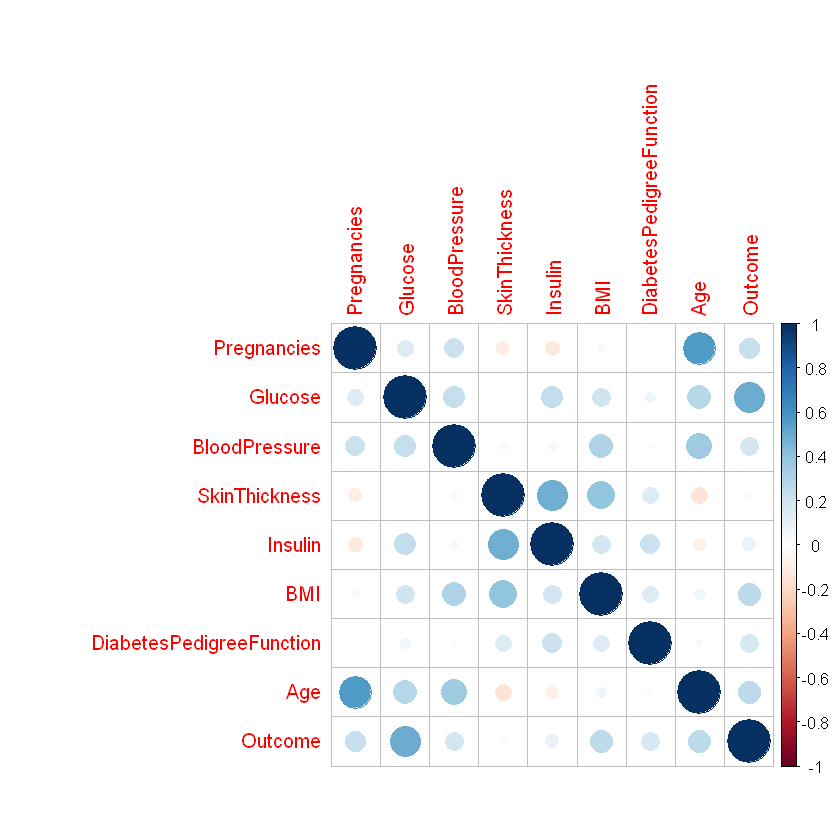

In [9]:
#TInh correlation giua moi cap numeric variables
correlations <- cor(mydata[,1:9])
print(correlations)
corrplot(correlations, method = "circle")

In [10]:
#Tao tao traing & test
#set.seed(42) # giu lai bo du lieu lan dau tao khi chay lai nhieu lan
trainingRowindex <- sample(1:nrow(mydata),  size = 0.7*nrow(mydata), replace = FALSE)#row indicate for train data, replace= FALSE khong co bo mau nao trung voi bo mau nao
print("select train row index")
print(trainingRowindex) 
trainingdata <- mydata[trainingRowindex,] #train data
testdata <- mydata[-trainingRowindex,] #train data
print("Rows of train data and test data:")
print(nrow(trainingdata))
print(nrow(testdata))

[1] "select train row index"
  [1] 600 294 540  22 635 396  92 488 319 167 273 299 409  57 631  71 543  21
 [19] 262 603 609 166 410 290 517 501 196 190 155 220 504 402 569 506 582 386
 [37] 358 530 629 242 213 295 459 456 466 130 463 438 377  98 550 292 378 185
 [55] 110 361  89 442  73 256 621 494 125 226 398 245  23 142 291 275 369 373
 [73] 309 168 333 634 154 153 537 165  63 310 230 347 444 485 552 114 134 565
 [91]  19 483   6   1 128   7 132 413 414 304  41 106 602 158 381  48 244 382
[109]  40 632 559 420 464  39 516 547 493 341 237 184 251 399 257 235 313 186
[127] 287   2 411 334 145 179 542 279 116 146 283 578 395 580 583 214 416  61
[145] 250 383 449  20 335 121 470 365 329 431 423 617 239 439  62  96 441 133
[163]  35 477  25 296 613 387 500 234 227 608  42 139 460 623 176 551 170 443
[181] 129 238 615  69 392 532 293  56 461 636 589  49 407 445 122  79 422 417
[199] 218 357 306 202 258  52 346  54 221 351  18  51  59 433 498 595 219  50
[217] 601 480 248 571 182 598 246 2

In [11]:
#Xay mo hinh
mylogit <- glm(Outcome ~ ., data = trainingdata, family = "binomial")
print(summary(mylogit))


Call:
glm(formula = Outcome ~ ., family = "binomial", data = trainingdata)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3102  -0.7044  -0.4008   0.6224   2.4693  

Coefficients:
                          Estimate Std. Error z value Pr(>|z|)    
(Intercept)              -9.724385   1.118994  -8.690  < 2e-16 ***
Pregnancies               0.058700   0.045542   1.289  0.19742    
Glucose                   0.037881   0.005149   7.357 1.88e-13 ***
BloodPressure            -0.010293   0.012625  -0.815  0.41489    
SkinThickness            -0.004413   0.010018  -0.441  0.65956    
Insulin                  -0.001952   0.001887  -1.035  0.30079    
BMI                       0.119807   0.024806   4.830 1.37e-06 ***
DiabetesPedigreeFunction  1.470846   0.492662   2.986  0.00283 ** 
Age                       0.013164   0.013900   0.947  0.34360    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)


In [12]:
pred = predict(mylogit, newdata = testdata, type = "response")

In [13]:
pred_value <- ifelse(pred > 0.5,1,0)
print("Testdata admit vs predict (10 rows:)")
result <- data.frame(testAdmin = testdata$Outcome[30:40], pred_value[30:40])
print(result)

[1] "Testdata admit vs predict (10 rows:)"
    testAdmin pred_value.30.40.
117         1                 0
120         0                 0
123         0                 0
127         0                 1
128         0                 0
130         1                 0
131         1                 1
133         1                 1
134         0                 0
135         0                 0
138         0                 0


In [14]:
print(pred_value[30:40])
print(testdata$Outcome[30:40])

117 120 123 127 128 130 131 133 134 135 138 
  0   0   0   1   0   0   1   1   0   0   0 
 [1] 1 0 0 0 0 1 1 1 0 0 0


In [15]:
#Tinh toan do chinh xac cua mo hinh
#Solution 1
accuracy <- table(pred_value, testdata[,"Outcome"])
accuracy <- sum(diag(accuracy))/sum(accuracy)
print(paste("Accuracy 1:", accuracy))
#Solution 2
misclassficerror <- mean(pred_value != testdata$Outcome)
print(paste("Accuracy 2:", 1-misclassficerror))

[1] "Accuracy 1: 0.78125"
[1] "Accuracy 2: 0.78125"


In [16]:
#Make new predict
# 8, 176, 90, 34, 300, 33.7, 0.467, 58
# 1, 100, 66, 15, 56, 23.6, 0.666, 26
# 12, 88, 74, 40, 54, 35.3, 0.378, 48
print(colnames(testdata))

[1] "Pregnancies"              "Glucose"                 
[3] "BloodPressure"            "SkinThickness"           
[5] "Insulin"                  "BMI"                     
[7] "DiabetesPedigreeFunction" "Age"                     
[9] "Outcome"                 


In [17]:
#Du doan
y1 <- predict(mylogit, newdata = data.frame(Pregnancies = c(8, 1, 12),
                                           Glucose = c(176,100,88),
                                           BloodPressure = c(90,66,74),
                                           SkinThickness = c(34,15,40),
                                           Insulin = c(300,56,54),
                                           BMI = c(33.7,23.6,35.3),
                                           DiabetesPedigreeFunction = c(0.467,0.666,0.378),
                                           Age = c(58,26,48)),
             type = "response")

In [18]:
y1 <- ifelse(y1 > 0.5, 1, 0)
print("result:")
print(y1)

[1] "result:"
1 2 3 
1 0 0 


## Lựa chọn thuộc tính dùng BMA

In [19]:
cols <- colnames(mydata)
cols
yvar <- mydata[,('Outcome')]
xvar <- mydata[,cols[-9]]

[1] "Pregnancies"              "Glucose"                 
[3] "BloodPressure"            "SkinThickness"           
[5] "Insulin"                  "BMI"                     
[7] "DiabetesPedigreeFunction" "Age"                     
[9] "Outcome"

In [20]:
library('BMA')

Warning message:
"package 'BMA' was built under R version 3.6.2"Loading required package: survival
Warning message:
"package 'survival' was built under R version 3.6.3"Loading required package: leaps
Warning message:
"package 'leaps' was built under R version 3.6.2"Loading required package: robustbase
Warning message:
"package 'robustbase' was built under R version 3.6.2"
Attaching package: 'robustbase'

The following object is masked from 'package:survival':

    heart

Loading required package: inline

Attaching package: 'inline'

The following object is masked from 'package:Rcpp':

    registerPlugin

Loading required package: rrcov
Warning message:
"package 'rrcov' was built under R version 3.6.2"Scalable Robust Estimators with High Breakdown Point (version 1.5-2)



In [21]:
bma = bicreg(xvar, yvar, strict = F, OR = 2)#Khong co moi tuong quan de strict = F, OR = 2

In [22]:
print(summary(bma))


Call:
bicreg(x = xvar, y = yvar, strict = F, OR = 2)


  1  models were selected
 Best  1  models (cumulative posterior probability =  1 ): 

                          p!=0   EV       SD         model 1   
Intercept                 100   -1.06392  0.0927644    -1.06392
Pregnancies               100    0.02272  0.0047269     0.02272
Glucose                   100    0.00685  0.0005387     0.00685
BloodPressure               0    0.00000  0.0000000       .    
SkinThickness               0    0.00000  0.0000000       .    
Insulin                     0    0.00000  0.0000000       .    
BMI                       100    0.01172  0.0024389     0.01172
DiabetesPedigreeFunction  100    0.23196  0.0614925     0.23196
Age                         0    0.00000  0.0000000       .    
                                                               
nVar                                                      4    
r2                                                      0.315  
BIC                      

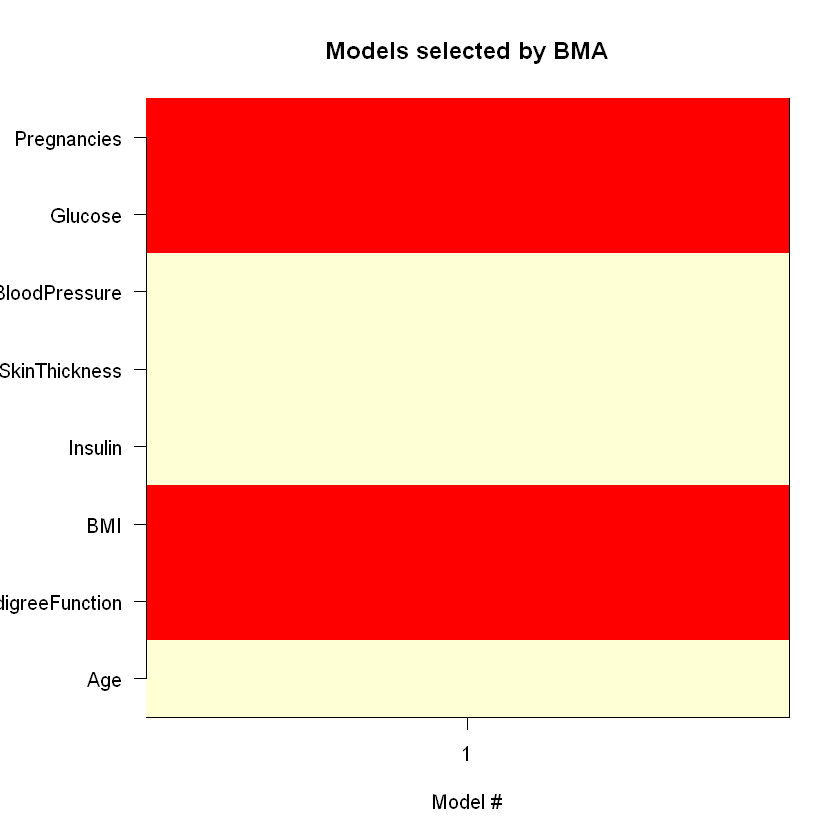

In [23]:
#visualize
imageplot.bma(bma)

**BMA đề xuất chỉ 1 model tốt nhất với 4 variables: Pregnancies, Glucose, BMI và DiabetesPedigreeFunction**

In [24]:
library('relaimpo')

Warning message:
"package 'relaimpo' was built under R version 3.6.3"Loading required package: MASS
Loading required package: boot
Warning message:
"package 'boot' was built under R version 3.6.3"
Attaching package: 'boot'

The following object is masked from 'package:robustbase':

    salinity

The following object is masked from 'package:survival':

    aml

Loading required package: survey
Warning message:
"package 'survey' was built under R version 3.6.3"Loading required package: grid
Loading required package: Matrix

Attaching package: 'survey'

The following object is masked from 'package:graphics':

    dotchart

Loading required package: mitools
Warning message:
"package 'mitools' was built under R version 3.6.3"This is the global version of package relaimpo.

If you are a non-US user, a version with the interesting additional metric pmvd is available

from Ulrike Groempings web site at prof.beuth-hochschule.de/groemping.



In [25]:
m = lm(Outcome ~  Pregnancies+Glucose+BMI+DiabetesPedigreeFunction, data = mydata)

In [26]:
calc.relimp(m, type = "lmg", rela = T, rank = T)

Response variable: Outcome 
Total response variance: 0.2153639 
Analysis based on 639 observations 

4 Regressors: 
Pregnancies Glucose BMI DiabetesPedigreeFunction 
Proportion of variance explained by model: 31.47%
Metrics are normalized to sum to 100% (rela=TRUE). 

Relative importance metrics: 

                                lmg
Pregnancies              0.11992318
Glucose                  0.65821238
BMI                      0.14989005
DiabetesPedigreeFunction 0.07197439

Average coefficients for different model sizes: 

                                  1X         2Xs         3Xs        4Xs
Pregnancies              0.032444850 0.028741903 0.025544055 0.02272065
Glucose                  0.007841235 0.007482791 0.007152464 0.00684976
BMI                      0.019429372 0.016618307 0.014052056 0.01171745
DiabetesPedigreeFunction 0.331143268 0.287853450 0.255415123 0.23195845

## Ex2: Low birth weight
##### Yêu cầu: Logistic Regression để thực hiện việc xác định trẻ có thiếu cân hay không dựa vào thông tin còn lại.

In [123]:
mydata <- read.csv("Chapter 18-19\\birthweight_reduced.csv")
head(mydata)

id,headcirumference,length,Birthweight,Gestation,smoker,motherage,mnocig,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35,LowBirthWeight
1313,12,17,5.8,33,0,24,0,58,99,26,16,0,66,1,0,Low
431,12,19,4.2,33,1,20,7,63,109,20,10,35,71,1,0,Low
808,13,19,6.4,34,0,26,0,65,140,25,12,25,69,0,0,Normal
300,12,18,4.5,35,1,41,7,65,125,37,14,25,68,1,1,Low
516,13,18,5.8,35,1,20,35,67,125,23,12,50,73,1,0,Low
321,13,19,6.8,37,0,28,0,62,118,39,10,0,67,0,0,Normal


In [124]:
#Xem thong tin
print(tail(mydata))
print(paste("No rows: ", nrow(mydata)))
print(paste("No columns: ", ncol(mydata)))
print(summary(mydata))

     id headcirumference length Birthweight Gestation smoker motherage mnocig
37 1764               15     22        10.0        41      1        32     12
38  553               14     21         8.6        42      0        24      0
39 1191               13     21         8.0        42      0        21      0
40 1360               13     22        10.0        44      0        20      0
41  223               13     19         8.5        45      1        28     25
42 1187               14     20         8.9        44      0        20      0
   mheight mppwt fage fedyrs fnocig fheight lowbwt mage35 LowBirthWeight
37      68   154   38     14     25      71      0      0         Normal
38      69   143   30     12      0      72      0      0         Normal
39      65   132   21     10     25      73      0      0         Normal
40      63   125   23     10     35      70      0      0         Normal
41      64   118   30     16      0      72      0      0         Normal
42      68   150

In [125]:
str(mydata)

'data.frame':	42 obs. of  17 variables:
 $ id              : int  1313 431 808 300 516 321 1363 575 822 1081 ...
 $ headcirumference: int  12 12 13 12 13 13 12 12 13 14 ...
 $ length          : int  17 19 19 18 18 19 19 19 19 21 ...
 $ Birthweight     : num  5.8 4.2 6.4 4.5 5.8 6.8 5.2 6.1 7.5 8 ...
 $ Gestation       : int  33 33 34 35 35 37 37 37 38 38 ...
 $ smoker          : int  0 1 0 1 1 0 1 1 0 0 ...
 $ motherage       : int  24 20 26 41 20 28 20 19 20 18 ...
 $ mnocig          : int  0 7 0 7 35 0 7 7 0 0 ...
 $ mheight         : int  58 63 65 65 67 62 64 65 62 67 ...
 $ mppwt           : int  99 109 140 125 125 118 104 132 103 109 ...
 $ fage            : int  26 20 25 37 23 39 20 20 22 20 ...
 $ fedyrs          : int  16 10 12 14 12 10 10 14 14 12 ...
 $ fnocig          : int  0 35 25 25 50 0 35 0 0 7 ...
 $ fheight         : int  66 71 69 68 73 67 73 72 70 67 ...
 $ lowbwt          : int  1 1 0 1 1 0 1 0 0 0 ...
 $ mage35          : int  0 0 0 1 0 0 0 0 0 0 ...
 $ LowBirthWei

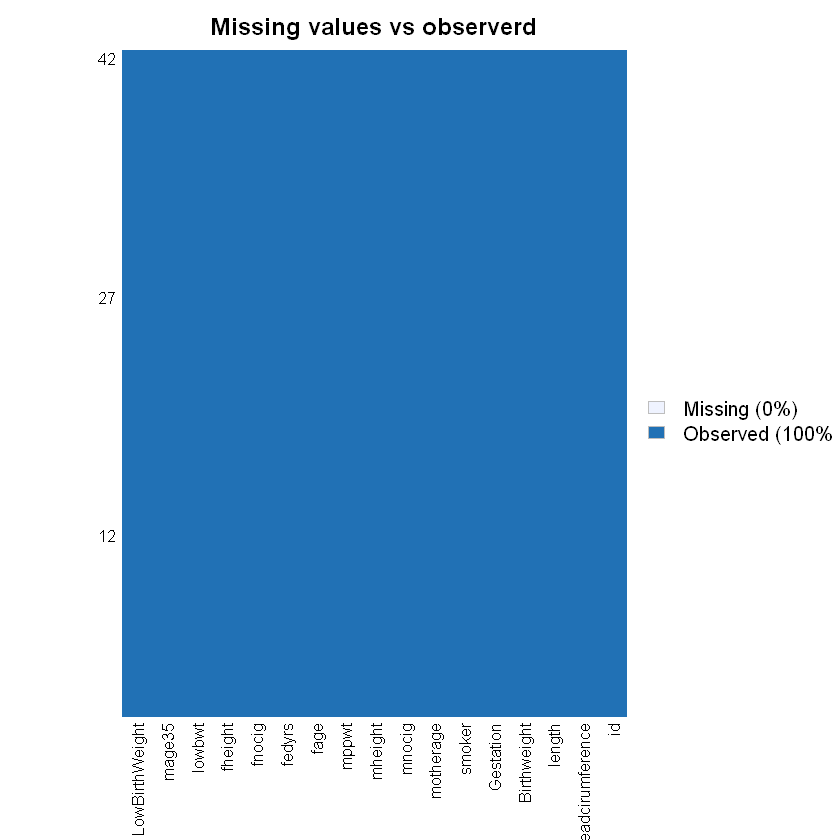

In [126]:
#check missing values
library(Amelia)
missmap(mydata, main = "Missing values vs observerd")

In [127]:
library('corrplot')

In [128]:
#Check class bias
print(table(mydata$LowBirthWeight))


   Low Normal 
     6     36 


In [129]:
#Function box plot
boxplot.fuction <- function(column, columns_name) {
  plot <- boxplot(column, main = columns_name,
                   sub = paste("Outliers rows:", boxplot.stats(column)$out))
}

[1] "headcirumference" "length"           "Birthweight"      "Gestation"       
 [5] "smoker"           "motherage"        "mnocig"           "mheight"         
 [9] "mppwt"            "fage"             "fedyrs"           "fnocig"          
[13] "fheight"          "lowbwt"           "mage35"

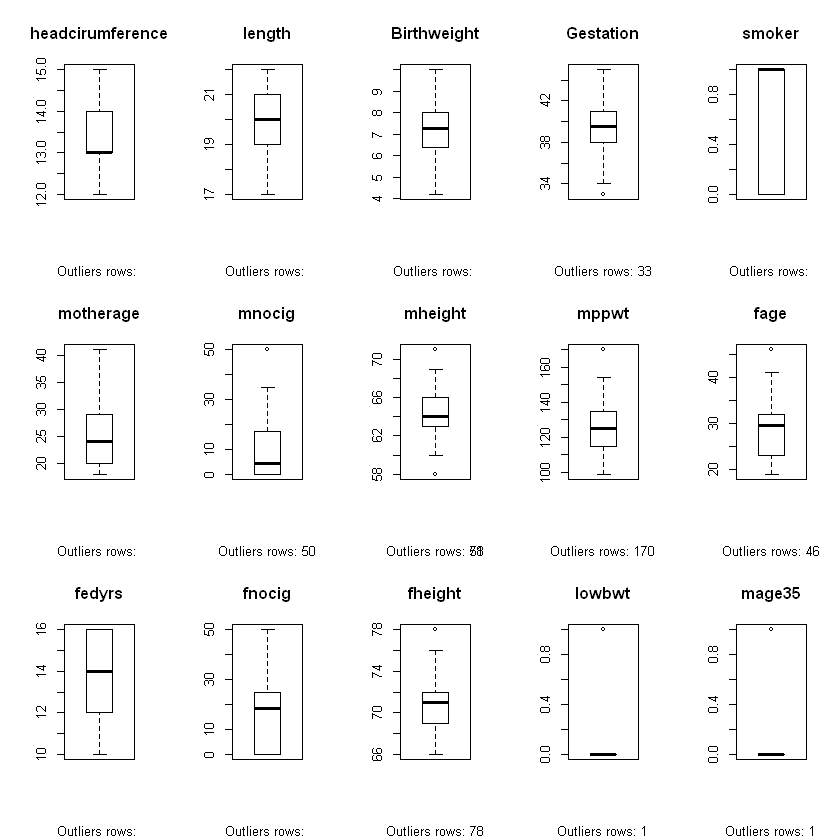

In [130]:
#Xem outlier
cols <- colnames(mydata[,c(-1,-17)])
cols
par(mfrow = c(3,5) ) #divide graph area in 2 columns
for (record in cols) {
    boxplot.fuction(mydata[[record]], record)
}
#boxplot.fuction(mydata)

Nhận xét: 'Gestation' 'mnocig' 'mheight' 'mppwt' 'fage' 'fheight'  có outliers

In [131]:
#Loai bo outliers
str_outliers <- c( 'Gestation', 'mnocig' ,'mheight', 'mppwt' ,'fage', 'fheight')
print(paste("Befor drop:", nrow(mydata)))
for (str in str_outliers) {
    outliers <- boxplot.stats(mydata[[str]])$out
    for (record in outliers) {
    mydata <- mydata[mydata[[str]] != record,]
    }    
}
print(paste("After drop:", nrow(mydata)))

[1] "Befor drop: 42"
[1] "After drop: 36"


                 headcirumference       length Birthweight    Gestation
headcirumference       1.00000000  0.534915249  0.68633480  0.336398480
length                 0.53491525  1.000000000  0.70888862  0.589639533
Birthweight            0.68633480  0.708888620  1.00000000  0.691606423
Gestation              0.33639848  0.589639533  0.69160642  1.000000000
smoker                -0.20983719 -0.314221062 -0.31605483 -0.141250150
motherage              0.10536894 -0.091848088 -0.08588716 -0.139895295
mnocig                -0.12891541 -0.296087635 -0.20455236 -0.062704342
mheight                0.34058737  0.274303118  0.30156879  0.071706628
mppwt                  0.24756903  0.217369813  0.29288289  0.110469221
fage                   0.19845538  0.008036612  0.02204126  0.008592422
fedyrs                 0.07572824 -0.012717688  0.01372577  0.104300785
fnocig                -0.10638565 -0.015881109 -0.12710985 -0.109123981
fheight               -0.02027312  0.176473707  0.07694426  0.16

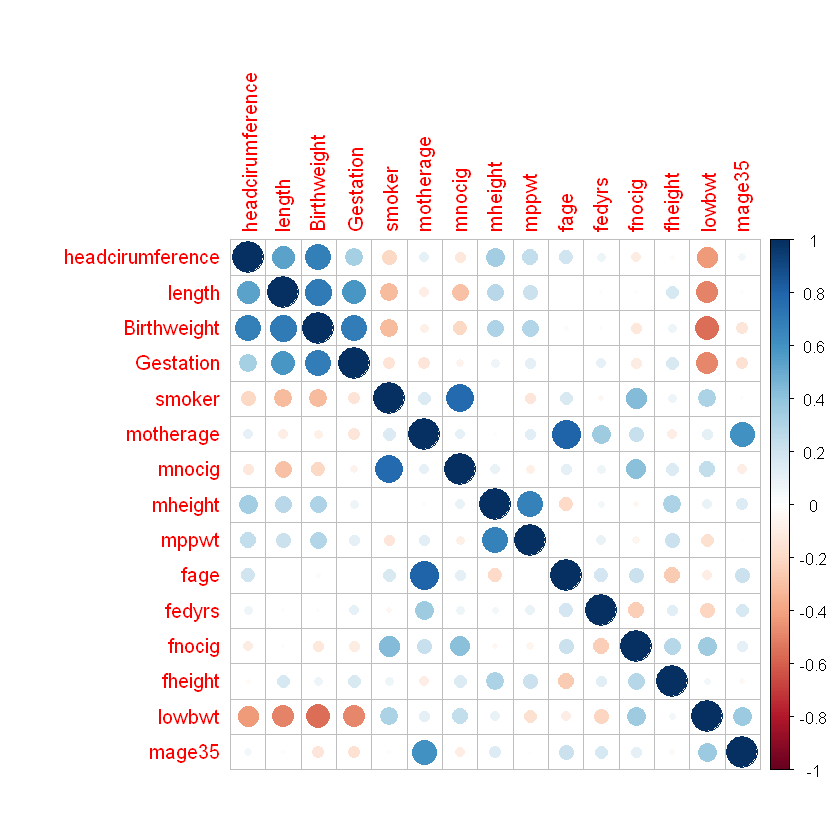

In [132]:
#TInh correlation giua moi cap numeric variables
correlations <- cor(mydata[,2:16])
print(correlations)
corrplot(correlations, method = "circle")

In [133]:
mydata <- mydata[,2:17]
head(mydata)

,headcirumference,length,Birthweight,Gestation,smoker,motherage,mnocig,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35,LowBirthWeight
3,13,19,6.4,34,0,26,0,65,140,25,12,25,69,0,0,Normal
4,12,18,4.5,35,1,41,7,65,125,37,14,25,68,1,1,Low
5,13,18,5.8,35,1,20,35,67,125,23,12,50,73,1,0,Low
6,13,19,6.8,37,0,28,0,62,118,39,10,0,67,0,0,Normal
7,12,19,5.2,37,1,20,7,64,104,20,10,35,73,1,0,Low
8,12,19,6.1,37,1,19,7,65,132,20,14,0,72,0,0,Normal


In [134]:
#Tao tao traing & test
#set.seed(42) # giu lai bo du lieu lan dau tao khi chay lai nhieu lan
trainingRowindex <- sample(1:nrow(mydata),  size = 0.7*nrow(mydata), replace = FALSE)#row indicate for train data, replace= FALSE khong co bo mau nao trung voi bo mau nao
print("select train row index")
print(trainingRowindex) 
trainingdata <- mydata[trainingRowindex,] #train data
testdata <- mydata[-trainingRowindex,] #train data
print("Rows of train data and test data:")
print(nrow(trainingdata))
print(nrow(testdata))

[1] "select train row index"
 [1] 18 19 20 10 34  1 28  4  8 35 15 16 26 27 21 22 31  7 36 13 29 23 11  6  2
[1] "Rows of train data and test data:"
[1] 25
[1] 11


In [135]:
#Xay mo hinh
mylogit <- glm(LowBirthWeight ~ ., data = trainingdata, family = "binomial")
print(summary(mylogit))


Call:
glm(formula = LowBirthWeight ~ ., family = "binomial", data = trainingdata)

Deviance Residuals: 
       Min          1Q      Median          3Q         Max  
-3.971e-06   3.971e-06   3.971e-06   3.971e-06   3.971e-06  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)
(Intercept)       2.557e+01  2.692e+06       0        1
headcirumference  1.195e-07  1.032e+05       0        1
length            9.214e-08  7.624e+04       0        1
Birthweight      -1.056e-07  9.118e+04       0        1
Gestation         1.524e-07  3.800e+04       0        1
smoker            1.017e-06  2.336e+05       0        1
motherage         3.000e-08  3.004e+04       0        1
mnocig           -4.174e-08  1.120e+04       0        1
mheight           1.112e-07  3.787e+04       0        1
mppwt            -3.065e-08  4.971e+03       0        1
fage             -7.717e-08  1.970e+04       0        1
fedyrs           -5.545e-08  3.196e+04       0        1
fnocig            1.815e-08  4

In [136]:
pred = predict(mylogit, newdata = testdata, type = "response")

In [137]:
pred_value <- ifelse(pred > 0.5,"Normal","Low")
print("Testdata admit vs predict ")
result <- data.frame(testAdmin = testdata$LowBirthWeight, pred_value)
print(result)

[1] "Testdata admit vs predict "
   testAdmin pred_value
5        Low        Low
7        Low        Low
11    Normal     Normal
14    Normal     Normal
16    Normal     Normal
21    Normal     Normal
28    Normal     Normal
29    Normal     Normal
36    Normal     Normal
38    Normal     Normal
39    Normal     Normal


In [138]:
#Tinh toan do chinh xac cua mo hinh
#Solution 1
accuracy <- table(pred_value, testdata[,"LowBirthWeight"])
accuracy <- sum(diag(accuracy))/sum(accuracy)
print(paste("Accuracy 1:", accuracy))
#Solution 2
misclassficerror <- mean(pred_value != testdata$LowBirthWeight)
print(paste("Accuracy 2:", 1-misclassficerror))

[1] "Accuracy 1: 1"
[1] "Accuracy 2: 1"


In [139]:
names(testdata)

[1] "headcirumference" "length"           "Birthweight"      "Gestation"       
 [5] "smoker"           "motherage"        "mnocig"           "mheight"         
 [9] "mppwt"            "fage"             "fedyrs"           "fnocig"          
[13] "fheight"          "lowbwt"           "mage35"           "LowBirthWeight"

In [140]:
#predict new
#sample (12,18,4.5,35,1,41,7,65,125,37,14,25,68,1,1)
y1 <- predict(mylogit, newdata = data.frame(headcirumference = c(12),
                                           length = c(18),
                                           Birthweight = c(4.5),
                                           Gestation = c(35),
                                           smoker = c(1),
                                           motherage = c(41),
                                           mnocig = c(7),
                                           mheight = c(65),
                                           mppwt = c(125),
                                           fage = c(37),
                                           fedyrs = c(14),
                                           fnocig = c(25),
                                           fheight = c(68),
                                           lowbwt = c(1),
                                           mage35 = c(1)), type = "response")

In [141]:
y1 <- ifelse(y1 > 0.5 , "Normal", "Low")
print("result:")
print(y1)

[1] "result:"
    1 
"Low" 


## Lựa chọn thuộc tính dùng BMA

In [150]:
str(mydata)

'data.frame':	36 obs. of  16 variables:
 $ headcirumference: int  13 12 13 13 12 12 13 14 14 14 ...
 $ length          : int  19 18 18 19 19 19 19 21 20 20 ...
 $ Birthweight     : num  6.4 4.5 5.8 6.8 5.2 6.1 7.5 8 8.6 7.1 ...
 $ Gestation       : int  34 35 35 37 37 37 38 38 38 38 ...
 $ smoker          : int  0 1 1 0 1 1 0 0 0 0 ...
 $ motherage       : int  26 41 20 28 20 19 20 18 29 31 ...
 $ mnocig          : int  0 7 35 0 7 7 0 0 0 0 ...
 $ mheight         : int  65 65 67 62 64 65 62 67 64 64 ...
 $ mppwt           : int  140 125 125 118 104 132 103 109 135 125 ...
 $ fage            : int  25 37 23 39 20 20 22 20 31 35 ...
 $ fedyrs          : int  12 14 12 10 10 14 14 12 16 16 ...
 $ fnocig          : int  25 25 50 0 35 0 0 7 0 0 ...
 $ fheight         : int  69 68 73 67 73 72 70 67 70 72 ...
 $ lowbwt          : int  0 1 1 0 1 0 0 0 0 0 ...
 $ mage35          : int  0 1 0 0 0 0 0 0 0 0 ...
 $ LowBirthWeight  : Factor w/ 2 levels "Low","Normal": 2 1 1 2 1 2 2 2 2 2 ...


In [144]:
cols <- colnames(mydata)
cols
yvar <- mydata[,('LowBirthWeight')]
xvar <- mydata[,cols[-16]]

[1] "headcirumference" "length"           "Birthweight"      "Gestation"       
 [5] "smoker"           "motherage"        "mnocig"           "mheight"         
 [9] "mppwt"            "fage"             "fedyrs"           "fnocig"          
[13] "fheight"          "lowbwt"           "mage35"           "LowBirthWeight"

In [145]:
library('BMA')

Warning message:
"package 'BMA' was built under R version 3.6.2"Loading required package: survival
Warning message:
"package 'survival' was built under R version 3.6.3"Loading required package: leaps
Warning message:
"package 'leaps' was built under R version 3.6.2"Loading required package: robustbase
Warning message:
"package 'robustbase' was built under R version 3.6.2"
Attaching package: 'robustbase'

The following object is masked from 'package:survival':

    heart

Loading required package: inline

Attaching package: 'inline'

The following object is masked from 'package:Rcpp':

    registerPlugin

Loading required package: rrcov
Warning message:
"package 'rrcov' was built under R version 3.6.2"Scalable Robust Estimators with High Breakdown Point (version 1.5-2)



In [146]:
bma = bicreg(xvar, yvar, strict = F, OR = 2)#Khong co moi tuong quan de strict = F, OR = 2

In [147]:
print(summary(bma))


Call:
bicreg(x = xvar, y = yvar, strict = F, OR = 2)


  1  models were selected
 Best  1  models (cumulative posterior probability =  1 ): 

                  p!=0   EV  SD         model 1 
Intercept         100    2   7.400e-17     2.0  
headcirumference    0    0   0.000e+00     .    
length              0    0   0.000e+00     .    
Birthweight         0    0   0.000e+00     .    
Gestation           0    0   0.000e+00     .    
smoker              0    0   0.000e+00     .    
motherage           0    0   0.000e+00     .    
mnocig              0    0   0.000e+00     .    
mheight             0    0   0.000e+00     .    
mppwt               0    0   0.000e+00     .    
fage                0    0   0.000e+00     .    
fedyrs              0    0   0.000e+00     .    
fnocig              0    0   0.000e+00     .    
fheight             0    0   0.000e+00     .    
lowbwt            100   -1   2.564e-16    -1.0  
mage35              0    0   0.000e+00     .    
                        

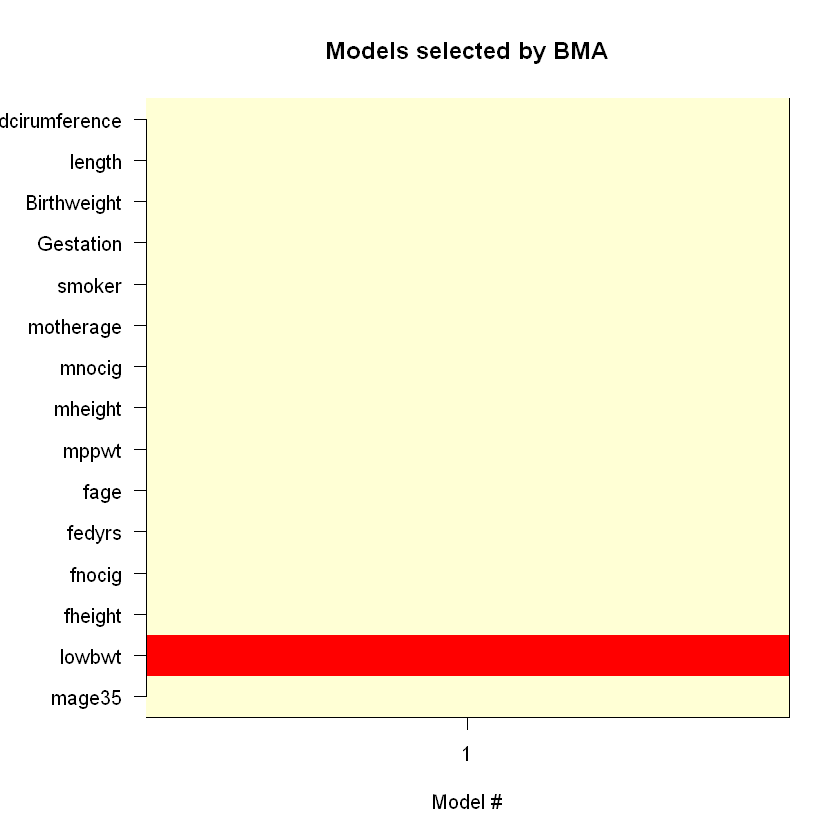

In [148]:
#visualize
imageplot.bma(bma)

**BMA đề xuất chỉ 1 model tốt nhất với chỉ 1 variables: lowbwt**